## Multilayer Neural Network - XOR 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

### Fonctions d'activation
Pour déterminer la sortie du réseau neuronalle multicouches, il est essentiel de définir quelques fonctions d'activation et leurs dérivées.

In [15]:
# Sigmoid Activation Function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

sigmoid_funcs = {'activation_function' : sigmoid, 'activation_function_derivative' : sigmoid_derivative}

In [16]:
# Tanh Activation Function

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

tanh_funcs = {'activation_function' : tanh, 'activation_function_derivative' : tanh_derivative}

In [17]:
# Softplus Activation Function

def softplus(x):
    return np.log(1+np.exp(x))

def softplus_derivative(x):
    return  1/(1+np.exp(-x))

soft_funcs = {'activation_function' : softplus, 'activation_function_derivative' : softplus_derivative}

In [18]:
# ReLu Activation Function

def ReLu(x):
    return x * (x > 0) 

def ReLU_derivative(x):
    return 1. * (x > 0)

relu_funcs = {'activation_function' : ReLu, 'activation_function_derivative' : ReLU_derivative}

In [19]:
# Leaky ReLu Activation Function

def LeakyReLu(x):
    return x * (x > 0) + 0.01 * (x <= 0)

def LeakyReLu_derivative(x):
    return 1. * (x > 0) + 0.01 * (x <= 0)

leakyRelu_funcs = {'activation_function' : LeakyReLu, 'activation_function_derivative' : LeakyReLu_derivative}

 ## Classe MultiLayerNN 

In [20]:
class MultiLayerNN:
    
    # Un constructeur pour initialiser le réseau de neurones
    def __init__(self, input, hidden, output):
        
        # input : Nombre de neurones de la couche d'entrée
        # hidden : Nombre de neurones de la couche cachée
        # output : Nombre de neurones de la couche de sortie
        
        np.random.seed(0)
        
        # Initialisation des weights et du bias de la couche cachée 
        self.hidden_weights = np.random.rand(input, hidden)
        self.hidden_bias = np.random.rand(1, hidden)
        
        # Inialization des weights et du bias de la couche de sortie
        self.output_weights = np.random.rand(hidden, output)
        self.output_bias = np.random.rand(1, output)
        
# --------------------------------------------------------------------
        
    # Une méthode fit pour l’apprentissage basé sur l’Algorithme gradient Descent
    def fit(self, X, y, nbr_iter=1000, learning_rate=0.01, activation_function = sigmoid_funcs):
        
        # Choisir la fonction d'activation à utiliser
        self.activation_function = activation_function['activation_function']
        self.activation_function_derivative = activation_function['activation_function_derivative']
        
        yy = y
        y = y.reshape(-1,1)
        m = (nbr_iter/10)
        
        for i in range(nbr_iter):
            
            # Forward Pass 
            # Couche cachée
            # Calculer la somme pondérée des données entrant à la couche cachée
            hidden_layer_sum = np.dot(X, self.hidden_weights) + self.hidden_bias
            # Appliquer la fonction d'activation pour les données à la sortie de la couche cachée
            hidden_layer_out = self.activation_function(hidden_layer_sum)
            
            # Couche de sortie
            output_layer_sum = np.dot(hidden_layer_out, self.output_weights) + self.output_bias
            # Valeur prédite
            predicted_y = self.activation_function(output_layer_sum)
            
            #Backward pass
            dloss_dbias_out = (predicted_y - y) * self.activation_function_derivative(predicted_y)
            dloss_dw_out = hidden_layer_out.T.dot(dloss_dbias_out)
            
            dloss_dbias_h = (dloss_dbias_out).dot(self.output_weights.T) * self.activation_function_derivative(hidden_layer_out)
            dloss_dw_h = X.T.dot(dloss_dbias_h)
            
            # Update
            self.hidden_weights -= dloss_dw_h * learning_rate
            self.hidden_bias -= np.sum(dloss_dbias_h,axis = 0, keepdims = True) * learning_rate
            
            self.output_weights -= dloss_dw_out * learning_rate
            self.output_bias -= np.sum(dloss_dbias_out, axis = 0, keepdims = True) * learning_rate
            
            if (i % m == 0) :
                print(" Iteration N° ({}) => Loss : {:.4f} --- Accuracy : {:.4f} ".format(i, np.mean((predicted_y - yy)**2), (yy == self.predict(X)).mean()))
    
# --------------------------------------------------------------------
    
    # Une méthode predict pour faire la prédiction
    def predict(self, X):
        
        # Couche cachée
        hidden_layer_sum = np.dot(X, self.hidden_weights) + self.hidden_bias
        hidden_layer_out = self.activation_function(hidden_layer_sum)
            
        # Couche de sorite
        output_layer_sum = np.dot(hidden_layer_out,self.output_weights) + self.output_bias
            
        # Valeur prédite
        predicted_y = self.activation_function(output_layer_sum)
            
        return np.round(predicted_y).reshape(1,-1)[0]

##  Dataset utilisé dans #program2 de l’atelier « 3.Multi Layer NN - XOR problem »

In [21]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

In [22]:
X[0:30]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [23]:
y[0:30]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0])

### Définition des paramétres et Création du modèle

In [24]:
# Nombre de neurones de la couche d'entrée
input = 2
# Nombre de neurones de la couche cachée
hidden = 6
# Nombre de neurones de la couche de sortie
output = 1

## Application N° 1 en utilisant ReLu 

 Iteration N° (0) => Loss : 15.2962 --- Accuracy : 0.3600 
 Iteration N° (1000) => Loss : 0.3716 --- Accuracy : 0.9267 
 Iteration N° (2000) => Loss : 0.3993 --- Accuracy : 0.9500 
 Iteration N° (3000) => Loss : 0.4063 --- Accuracy : 0.9500 
 Iteration N° (4000) => Loss : 0.4070 --- Accuracy : 0.9500 
 Iteration N° (5000) => Loss : 0.4103 --- Accuracy : 0.9567 
 Iteration N° (6000) => Loss : 0.4091 --- Accuracy : 0.9833 
 Iteration N° (7000) => Loss : 0.4100 --- Accuracy : 0.9800 
 Iteration N° (8000) => Loss : 0.4161 --- Accuracy : 0.9700 
 Iteration N° (9000) => Loss : 0.4213 --- Accuracy : 0.9733 


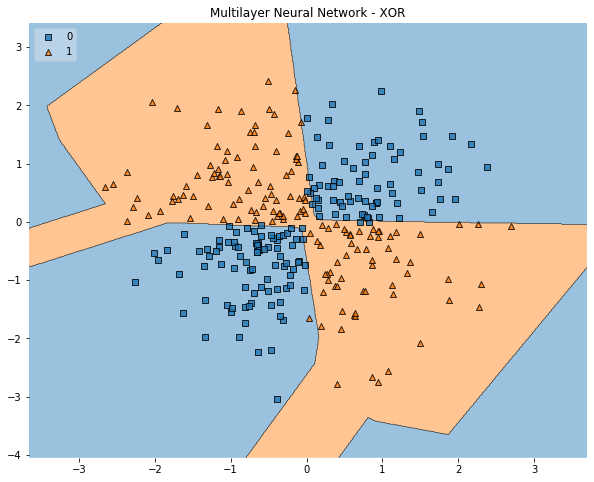

In [25]:
# Modèle
model = MultiLayerNN(input, hidden, output)

# Apprentissage
model.fit(X, y, nbr_iter=10000, learning_rate=0.0001, activation_function = relu_funcs)

# Plotting
fig = plt.figure(figsize = (10, 8))
fig = plot_decision_regions(X = X, y = y, clf=model, legend=2)
plt.title("Multilayer Neural Network - XOR")
plt.show()

## Application N° 2 en utilisant Tanh

 Iteration N° (0) => Loss : 0.9969 --- Accuracy : 0.3900 
 Iteration N° (1000) => Loss : 0.2576 --- Accuracy : 0.6567 
 Iteration N° (2000) => Loss : 0.2751 --- Accuracy : 0.6900 
 Iteration N° (3000) => Loss : 0.2920 --- Accuracy : 0.7033 
 Iteration N° (4000) => Loss : 0.3000 --- Accuracy : 0.7100 
 Iteration N° (5000) => Loss : 0.3082 --- Accuracy : 0.7567 
 Iteration N° (6000) => Loss : 0.3272 --- Accuracy : 0.8300 
 Iteration N° (7000) => Loss : 0.3430 --- Accuracy : 0.8600 
 Iteration N° (8000) => Loss : 0.3643 --- Accuracy : 0.9033 
 Iteration N° (9000) => Loss : 0.3858 --- Accuracy : 0.9300 


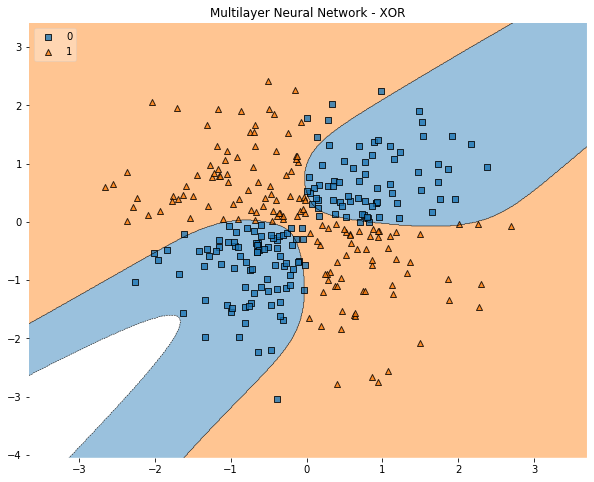

In [26]:
# Modèle
model = MultiLayerNN(input, hidden, output)

# Apprentissage
model.fit(X, y, nbr_iter=10000, learning_rate=0.0001, activation_function = tanh_funcs)

# Plotting
fig = plt.figure(figsize = (10, 8))
fig = plot_decision_regions(X = X, y = y, clf=model, legend=2)
plt.title("Multilayer Neural Network - XOR")
plt.show()

## Application N° 3 en utilisant Softplus

 Iteration N° (0) => Loss : 25.6636 --- Accuracy : 0.0067 
 Iteration N° (1000) => Loss : 0.2505 --- Accuracy : 0.6233 
 Iteration N° (2000) => Loss : 0.2538 --- Accuracy : 0.6500 
 Iteration N° (3000) => Loss : 0.2572 --- Accuracy : 0.6667 
 Iteration N° (4000) => Loss : 0.2591 --- Accuracy : 0.6833 
 Iteration N° (5000) => Loss : 0.2607 --- Accuracy : 0.7000 
 Iteration N° (6000) => Loss : 0.2637 --- Accuracy : 0.7167 
 Iteration N° (7000) => Loss : 0.2724 --- Accuracy : 0.7433 
 Iteration N° (8000) => Loss : 0.2929 --- Accuracy : 0.7533 
 Iteration N° (9000) => Loss : 0.3122 --- Accuracy : 0.7500 


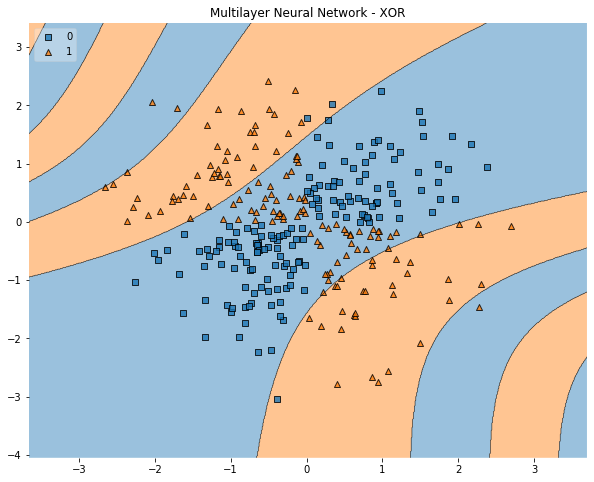

In [27]:
# Modèle
model = MultiLayerNN(input, hidden, output)

# Apprentissage
model.fit(X, y, nbr_iter=10000, learning_rate=0.0001, activation_function = soft_funcs)

# Plotting
fig = plt.figure(figsize = (10, 8))
fig = plot_decision_regions(X = X, y = y, clf=model, legend=2)
plt.title("Multilayer Neural Network - XOR")
plt.show()